In [1]:
!pip3 install torch

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import seaborn as sns
import matplotlib.style as style
from sklearn import datasets
style.use('seaborn-whitegrid')

In [0]:
# create dataset
n_pts=100

# we create centers of the futer clusters
# to make separation more difficult
centers = [[-0.5,0.5],[0.5,-0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, 
                          random_state = 123,
                          centers = centers,
                          cluster_std = 0.4)
#print(X)
#print(y)

In [0]:
def ScatterPlot():
  style.use('seaborn-dark-palette')
  sns.scatterplot(x = X[y==0,0], y = X[y==0,1])
  sns.scatterplot(x = X[y==1,0], y = X[y==1,1])

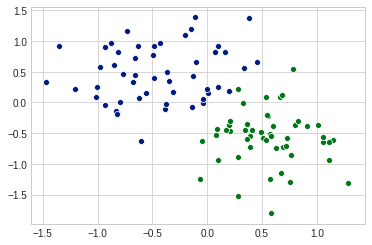

In [5]:
ScatterPlot()

In [0]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y)

In [0]:
#@title Perceptron


In [0]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  
  def predict(self,x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else: 
      return int(0)
  

In [8]:
torch.manual_seed(2)
model = Model(2,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [0]:
# This parameters are not optimal, 
#so we need to train our perceptron

In [0]:
[w,b] = model.parameters()
w1,w2 = w.view(2)

def GetParams():
  return (w1.item(),w2.item(),b[0].item())

In [0]:
def PlotFit(title):
  style.use('seaborn-pastel')
  plt.title = title
  #0 = w1*x1 + w2*x2 + b
  w1,w2,b1 = GetParams()
  x1 = np.array([-2.0,2.0])
  x2 = (w1*x1 + b1)/ (-w2)
  plt.plot(x1,x2, 'blueviolet')
  ScatterPlot()
  

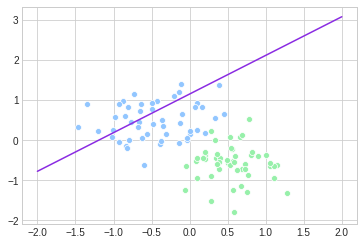

In [12]:
PlotFit('Initial_Model')

In [0]:
# Our criterion
criterion = nn.BCELoss()
# Update of the parameters
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [14]:
epochs = 500
losses = []
for i in range(epochs):
  
  # make predictions
  y_pred = model.forward(x_data)
  
  # Loss
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss", loss.item())
  
  
  losses.append(loss.item())

  #set gradients to zero
  optimizer.zero_grad()

  # back propagate our loss
  loss.backward()

  # calculate SGD. Step method is used to update parameters
  optimizer.step()
  
  

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:512: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


epoch: 0 loss 0.6185115575790405
epoch: 1 loss 0.6174639463424683
epoch: 2 loss 0.6164201498031616
epoch: 3 loss 0.6153794527053833
epoch: 4 loss 0.614342451095581
epoch: 5 loss 0.6133086681365967
epoch: 6 loss 0.6122783422470093
epoch: 7 loss 0.6112515330314636
epoch: 8 loss 0.6102280616760254
epoch: 9 loss 0.6092080473899841
epoch: 10 loss 0.6081910729408264
epoch: 11 loss 0.6071775555610657
epoch: 12 loss 0.606167733669281
epoch: 13 loss 0.6051608920097351
epoch: 14 loss 0.604157567024231
epoch: 15 loss 0.6031574606895447
epoch: 16 loss 0.602160632610321
epoch: 17 loss 0.6011670827865601
epoch: 18 loss 0.6001767516136169
epoch: 19 loss 0.599189817905426
epoch: 20 loss 0.5982059240341187
epoch: 21 loss 0.5972254276275635
epoch: 22 loss 0.5962479114532471
epoch: 23 loss 0.5952739119529724
epoch: 24 loss 0.5943028926849365
epoch: 25 loss 0.5933352112770081
epoch: 26 loss 0.5923705101013184
epoch: 27 loss 0.5914090275764465
epoch: 28 loss 0.5904508829116821
epoch: 29 loss 0.589495718479

In [15]:
((1-0.18401144444942474/0.18405595421791077))

0.0002418273762191392

In [16]:
GetParams()

(0.9602904319763184, -0.9720208644866943, 0.018554959446191788)

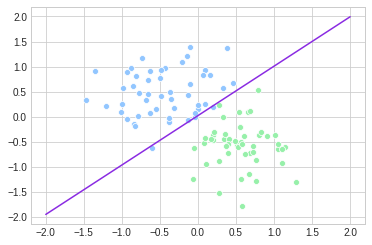

In [17]:
PlotFit("Final model")

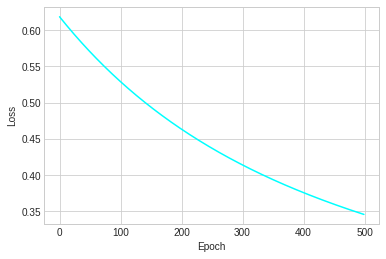

In [18]:
plt.plot(range(epochs), losses, color = "aqua")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [0]:
#@title Model Testing


Red point positive probability = 0.875541090965271
Red point class = 1
Black point positive probability = 0.1285594403743744
Black point class = 0


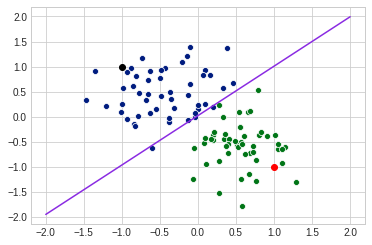

In [19]:
point1 = torch.tensor([1.0, -1.0])
point2 = torch.tensor([-1.0,1.0])
plt.plot(point1.numpy()[0],point1.numpy()[1], 'ro' )
plt.plot(point2.numpy()[0],point2.numpy()[1], 'ko' )

print("Red point positive probability = {}".format(
    model.forward(point1).item()))
print("Red point class = {}".format(
    model.predict(point1)))
print("Black point positive probability = {}".format(
    model.forward(point2).item()))
print("Black point class = {}".format(
    model.predict(point2)))

PlotFit("Final model")